# **Giới thiệu**

Trong bài này, chúng ta xây dựng một **pipeline học máy hoàn chỉnh** cho bài toán **phân loại hình ảnh sinh vật biển (Sea Animal Classification)**.  
    Hệ thống được thiết kế theo quy trình chuẩn của thị giác máy tính, bao gồm: **EDA, tiền xử lý, trích xuất đặc trưng, huấn luyện mô hình và đánh giá kết quả**.
    

### **1\. EDA (Exploratory Data Analysis)**

##

-   Phân tích đặc trưng của bộ dữ liệu ảnh:
    
    -   Thống kê số lượng, kích thước và tỷ lệ khung hình.
        
    -   Đánh giá độ sáng, độ tương phản và phân bố màu RGB.
        
    -   Phân tích sự cân bằng giữa các lớp sinh vật.
        

### **2\. Tiền xử lý dữ liệu (Data Preprocessing)**

##

-   Chuẩn hóa kích thước, tỷ lệ ảnh và tăng cường chất lượng bằng điều chỉnh độ sáng, tương phản.  
    Thực hiện **chia tập train/test**, **tăng cường dữ liệu (Data Augmentation)** và **chuẩn hóa pixel** để giúp mô hình học tốt hơn.
    

### **3\. Trích xuất đặc trưng (Feature Extraction)**

##

-   Sử dụng các mô hình học sâu hiện đại:
    
    -   **CNN (ResNet, EfficientNet)** để trích xuất đặc trưng không gian.
        
    -   **Transformer (ViT, Swin Transformer)** để khai thác thông tin toàn cục.  
        Đặc trưng được lưu trữ có hệ thống để phục vụ huấn luyện và đánh giá.
        

### **4\. Huấn luyện mô hình (Model Training)**

##

-   Thực hiện hai hướng tiếp cận:
    
    -   **Machine Learning pipeline:** huấn luyện SVM, Random Forest, Logistic Regression từ đặc trưng trích xuất.
        
    -   **Deep Learning end-to-end:** huấn luyện trực tiếp CNN hoặc hybrid CNN–Transformer.
        

### **5\. Đánh giá kết quả (Evaluation)**

##

-   So sánh mô hình dựa trên các chỉ số **Accuracy, Precision, Recall, F1-score**, cùng **Confusion Matrix** và trực quan hóa kết quả.
    

### **6\. Kết luận**

##

-   Tổng hợp và so sánh hiệu quả giữa các phương pháp, rút ra ưu nhược điểm và hướng phát triển cho hệ thống phân loại ảnh sinh vật biển trong tương lai.

    

### **Bộ dữ liệu sử dụng**

##

-  **Dataset:** _Sea Animals Image Dataset_
        
-   **Nguồn:** Kaggle – `vencerlanz09/sea-animals-image-dataset`
        
-   **Nội dung:** Hình ảnh các loài sinh vật biển như cá, sứa, sao biển, hải cẩu, cá mập,...
        
-  **Mục tiêu:** Huấn luyện mô hình nhận diện chính xác các loài sinh vật biển dựa trên đặc trưng hình dạng và màu sắc.

# **Cài đặt và Import Thư viện**
Trong bước này, chúng ta sẽ:
  - Cài đặt và khởi tạo các thư viện cần thiết cho toàn bộ pipeline xử lý dữ liệu và huấn luyện mô hình.
  - Clone repository GitHub của nhóm để sử dụng các module và cấu hình riêng.
  - Tải các file đặc trưng (features) được lưu trữ sẵn trên Google Drive để tái sử dụng khi cần.

Cấu hình có thể thay đổi:
  - `GITHUB_REPO_URL`: Đường dẫn repo chứa mã nguồn chính.
  - `GDRIVE_FOLDER_ID`: ID thư mục public trên Google Drive chứa dữ liệu/feature.
  - `TARGET_FOLDER`: Nơi lưu file sau khi tải.

In [ ]:
# ============================================================
# ⚙️ Cấu hình khởi tạo môi trường và tải dữ liệu
# ============================================================
CONFIG = {
    "GITHUB_REPO_URL": "https://github.com/nhinguyen140809/ml-asm-dna05.git",  # Repo nhóm
    "GDRIVE_FOLDER_ID": "1mJg-v71UdW7AlIkMEWppChHKjMZ38ZI5",                   # Folder chứa features
    "TARGET_FOLDER": "/content/features",                                      # Thư mục lưu file tải về
    "USE_EXTRACTED_FEATURES": False                                            # Có dùng feature trích xuất sẵn hay không
}

# ============================================================
# 📦 Cài đặt các thư viện cơ bản
# ============================================================
!pip install -q gdown  # Hỗ trợ tải file từ Google Drive

# ============================================================
# 🧩 Import thư viện cần thiết
# ============================================================
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import seaborn as sns
from tqdm import tqdm
from glob import glob
import kagglehub

# ============================================================
# 🔄 Clone repo GitHub của nhóm (tự động cập nhật mã nguồn)
# ============================================================
!rm -rf ml-asm-dna05  # Xoá repo cũ (nếu có)
!git clone -q {CONFIG["GITHUB_REPO_URL"]}  # Clone repo mới

# Nếu chạy trong môi trường Colab, có thể cần thêm sys.path:
# import sys
# sys.path.append("ml-asm-dna05/modules")

# ============================================================
# ☁️ Tải dữ liệu đặc trưng từ Google Drive
# ============================================================
target_folder = CONFIG["TARGET_FOLDER"]
os.makedirs(target_folder, exist_ok=True)

!gdown --folder https://drive.google.com/drive/folders/{CONFIG["GDRIVE_FOLDER_ID"]} -O {target_folder}

print(f"✅ Hoàn tất tải folder dữ liệu về {target_folder}")

Retrieving folder contents
Processing file 1KKM8Om7DoD7T3iBQ_nqgcVrZ3tN0WYXQ efficientnetb0_features.h5
Processing file 1qXhb-NzwmIlQll2zo0WM3NhWRzMJqqW8 resnet50_features.h5
Processing file 1l0kUpI3I3S4aMwZHEYh4qiM29NAWDXq3 vit-base-patch16-224_features.h5
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1KKM8Om7DoD7T3iBQ_nqgcVrZ3tN0WYXQ
To: /content/features/efficientnetb0_features.h5
100% 70.4M/70.4M [00:01<00:00, 63.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qXhb-NzwmIlQll2zo0WM3NhWRzMJqqW8
From (redirected): https://drive.google.com/uc?id=1qXhb-NzwmIlQll2zo0WM3NhWRzMJqqW8&confirm=t&uuid=4a380308-86ef-4e36-9993-024abd014f3d
To: /content/features/resnet50_features.h5
100% 113M/113M [00:01<00:00, 61.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l0kUpI3I3S4aMwZHEYh4qiM29NAWDXq3
To: /content/features/vit-base-patch16-224_features.h5
100% 

# **Tải Dataset**
Trong bước này, chúng ta sẽ:
  - Tải bộ Sea Animals Image Dataset từ Kaggle thông qua thư viện kagglehub.
  - Tự động lưu dữ liệu vào thư mục cache cục bộ của KaggleHub.
  - In ra đường dẫn dataset để phục vụ cho các bước xử lý kế tiếp (EDA, tiền xử lý, huấn luyện, …).

Cấu hình có thể thay đổi:
  - `DATASET_NAME`: Tên dataset trên Kaggle (có thể thay bằng bộ khác).
  - `DOWNLOAD_METHOD`: Phương thức tải (hiện tại dùng kagglehub.dataset_download).

In [ ]:
# ============================================================
# ⚙️ Cấu hình tải Dataset
# ============================================================
CONFIG = {
    "DATASET_NAME": "vencerlanz09/sea-animals-image-dataste",  # Tên dataset trên Kaggle
    "DOWNLOAD_METHOD": "kagglehub.dataset_download"             # Phương thức tải
}

# ============================================================
# 📦 Tải dataset từ Kaggle thông qua KaggleHub
# ============================================================
import kagglehub

# Thực hiện tải và lưu tạm trong bộ nhớ cache của KaggleHub
DATASET_PATH = kagglehub.dataset_download(CONFIG["DATASET_NAME"])

# ============================================================
# 📂 In thông tin đường dẫn sau khi tải
# ============================================================
print("✅ Dataset downloaded successfully!")
print(f"📁 Dataset path: {DATASET_PATH}")

100%|██████████| 312M/312M [00:15<00:00, 21.1MB/s]

Extracting files...


✅ Dataset downloaded successfully!
📁 Dataset path: /root/.cache/kagglehub/datasets/vencerlanz09/sea-animals-image-dataste/versions/5


# **1. EDA - Exploratory Data Analysis**
Trong bước này, chúng ta sẽ:
  - Duyệt toàn bộ thư mục chứa dữ liệu hình ảnh đã tải từ Kaggle.
  - Trích xuất thông tin cơ bản của từng ảnh bao gồm:
  - Tên lớp (Class)
  - Tên file (Image_Name)
  - Đường dẫn đầy đủ (Path)
  - Kích thước ảnh (Width, Height)
  - Số kênh màu (Channels)
  - Lưu toàn bộ thông tin vào một DataFrame để phục vụ cho giai đoạn phân tích EDA.

Cấu hình có thể thay đổi:
  - `DATASET_PATH`: Đường dẫn gốc chứa dataset (thường là kết quả tải từ KaggleHub).
  - `INCLUDE_EXTENSIONS`: Các định dạng ảnh được chấp nhận (ví dụ .jpg, .png, .jpeg).
  - `SHOW_SAMPLE_ROWS`: Số dòng hiển thị mẫu khi in DataFrame.

In [ ]:
# ============================================================
# ⚙️ Cấu hình tạo bảng tổng quan dữ liệu
# ============================================================
CONFIG = {
    "DATASET_PATH": DATASET_PATH,                        # Thư mục chứa toàn bộ ảnh
    "INCLUDE_EXTENSIONS": [".jpg", ".jpeg", ".png"],     # Chỉ quét các định dạng ảnh phổ biến
    "SHOW_SAMPLE_ROWS": 5                                # Số dòng hiển thị mẫu
}

# ============================================================
# 📸 Tạo DataFrame chứa thông tin chi tiết của tất cả ảnh
# ============================================================
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

records = []  # Danh sách lưu thông tin từng ảnh

# Duyệt qua từng thư mục con (tương ứng với mỗi lớp sinh vật)
for cls in tqdm(sorted(os.listdir(CONFIG["DATASET_PATH"])), desc="Scanning dataset"):
    class_path = os.path.join(CONFIG["DATASET_PATH"], cls)
    if not os.path.isdir(class_path):
        continue  # Bỏ qua file lẻ

    # Duyệt từng ảnh trong thư mục lớp
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if not any(img_name.lower().endswith(ext) for ext in CONFIG["INCLUDE_EXTENSIONS"]):
            continue  # Bỏ qua định dạng không hợp lệ

        try:
            # Mở ảnh để đọc thông tin kích thước và số kênh
            with Image.open(img_path) as img:
                width, height = img.size
                channels = len(img.getbands())  # e.g., ('R','G','B') → 3

                # Lưu thông tin vào danh sách
                records.append({
                    "Class": cls,
                    "Image_Name": img_name,
                    "Path": img_path,
                    "Width": width,
                    "Height": height,
                    "Channels": channels
                })
        except Exception as e:
            print(f"⚠️ Error reading {img_path}: {e}")

# ============================================================
# 🧾 Tạo DataFrame và hiển thị thông tin tổng quan
# ============================================================
df_img = pd.DataFrame(records)

print("\n=== 📊 Image Dataset Overview ===")
display(df_img.head(CONFIG["SHOW_SAMPLE_ROWS"]))
print(f"✅ Total images loaded: {len(df_img)}")
print(f"🧩 Number of classes: {df_img['Class'].nunique()}")


Scanning dataset: 100%|██████████| 23/23 [00:02<00:00,  8.30it/s]


=== 📊 Image Dataset Overview ===


,Class,Image_Name,Path,Width,Height,Channels
0,Clams,24350066811_370ebefed9_o.jpg,/root/.cache/kagglehub/datasets/vencerlanz09/s...,300,213,3
1,Clams,16964383132_4f336340d1_o.jpg,/root/.cache/kagglehub/datasets/vencerlanz09/s...,300,225,3
2,Clams,9474255784_3f38ba0958_b.jpg,/root/.cache/kagglehub/datasets/vencerlanz09/s...,300,200,3
3,Clams,21433453214_dd35f07765_o.jpg,/root/.cache/kagglehub/datasets/vencerlanz09/s...,300,225,3
4,Clams,6923634706_8406067938_o.jpg,/root/.cache/kagglehub/datasets/vencerlanz09/s...,300,300,3


✅ Total images loaded: 13711
🧩 Number of classes: 23


## 1.1. Phân tích kích thước ảnh
Trong bước này, chúng ta sẽ:

-   Phân tích thống kê cơ bản về kích thước (rộng, cao) và số kênh màu của toàn bộ ảnh.
    
-   Xác định các ảnh ngoại lệ (outliers) có kích thước vượt ngưỡng cho phép.
    
-   Loại bỏ các ảnh này để tạo tập dữ liệu “sạch” hơn phục vụ cho giai đoạn trực quan hóa và huấn luyện.
    
-   Trực quan hóa mối tương quan giữa chiều rộng và chiều cao của ảnh để kiểm tra tính đồng nhất về kích thước trong toàn bộ dataset.
    

Cấu hình có thể thay đổi:

-   `MAX_DIM`: Ngưỡng kích thước tối đa (pixel) dùng để xác định ảnh ngoại lệ.
    
-   `ALPHA`: Độ trong suốt khi vẽ scatter plot.
    
-   `FIG_SIZE`: Kích thước biểu đồ hiển thị.

In [ ]:
# ============================================================
# ⚙️ Cấu hình phân tích kích thước ảnh
# ============================================================
CONFIG = {
    "MAX_DIM": 1000,          # Ngưỡng kích thước tối đa (pixel)
    "ALPHA": 0.5,             # Độ trong suốt điểm scatter
    "FIG_SIZE": (8, 6)        # Kích thước biểu đồ
}

# ============================================================
# 📈 Phân tích thống kê kích thước ảnh
# ============================================================
stats = df_img[["Width", "Height", "Channels"]].describe().T
print("=== 📊 Global Image Statistics ===")
display(stats)

# Xác định ảnh có kích thước vượt quá ngưỡng (outliers)
outliers = df_img[
    (df_img["Width"] > CONFIG["MAX_DIM"]) |
    (df_img["Height"] > CONFIG["MAX_DIM"])
]

print(f"⚠️ Found {len(outliers)} outliers out of {len(df_img)} images")

# Lọc bỏ outliers để phục vụ trực quan hóa
df_viz = df_img[
    (df_img["Width"] <= CONFIG["MAX_DIM"]) &
    (df_img["Height"] <= CONFIG["MAX_DIM"])
]

print(f"✅ Remaining for visualization: {len(df_viz)} images")

=== 📊 Global Image Statistics ===


,count,mean,std,min,25%,50%,75%,max
Width,13711.0,293.073663,55.037037,131.0,300.0,300.0,300.0,5120.0
Height,13711.0,222.408942,49.806795,63.0,200.0,218.0,225.0,3840.0
Channels,13711.0,3.001313,0.046760,1.0,3.0,3.0,3.0,4.0


⚠️ Found 5 outliers out of 13711 images
✅ Remaining for visualization: 13706 images


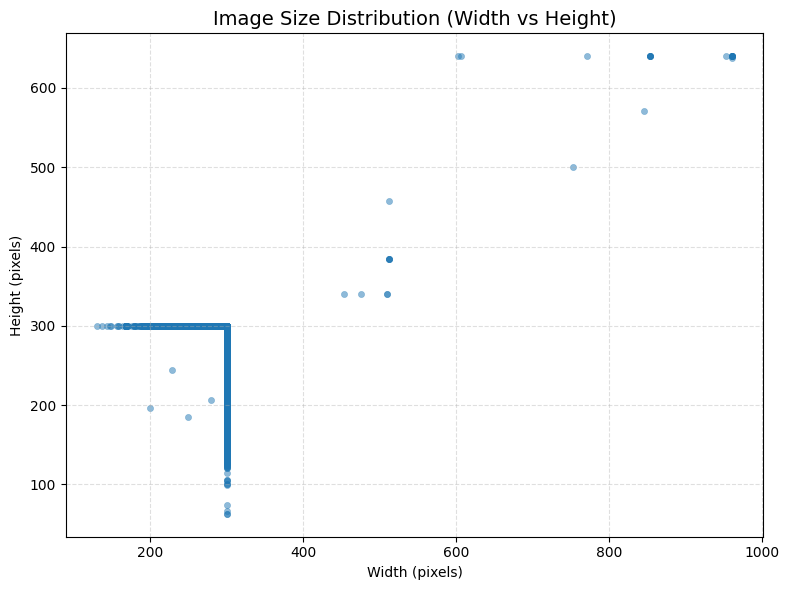

In [ ]:
# ============================================================
# 🖼️ Trực quan hóa phân bố kích thước ảnh
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=CONFIG["FIG_SIZE"])

sns.scatterplot(
    data=df_viz,
    x="Width",
    y="Height",
    alpha=CONFIG["ALPHA"],
    s=20,
    edgecolor=None
)

plt.title("Image Size Distribution (Width vs Height)", fontsize=14)
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## 1.2. Phân tích tỷ lệ khung hình (Aspect Ratio Analysis)

Trong bước này, chúng ta sẽ:

-   Tính **tỷ lệ khung hình (Aspect Ratio)** cho từng ảnh, được định nghĩa là:
    
    Aspect Ratio\=WidthHeight\\text{Aspect Ratio} = \\frac{\\text{Width}}{\\text{Height}}Aspect Ratio\=HeightWidth​
-   Phân tích **phân bố** và **mức độ đồng nhất** của tỷ lệ khung hình thông qua biểu đồ **histogram** và **boxplot**.
    
-   Kiểm tra xem ảnh trong dataset có xu hướng vuông (tỷ lệ ≈ 1) hay bị kéo dãn (tỷ lệ > 1 hoặc < 1).
    

Cấu hình có thể thay đổi:

-   `BINS`: Số lượng bins trong biểu đồ histogram.
    
-   `FIG_SIZE`: Kích thước tổng thể của biểu đồ.
    
-   `COLORS`: Màu sắc của từng loại biểu đồ để dễ nhận diện.

/tmp/ipython-input-1111683742.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz["Aspect_Ratio"] = df_viz["Width"] / df_viz["Height"]


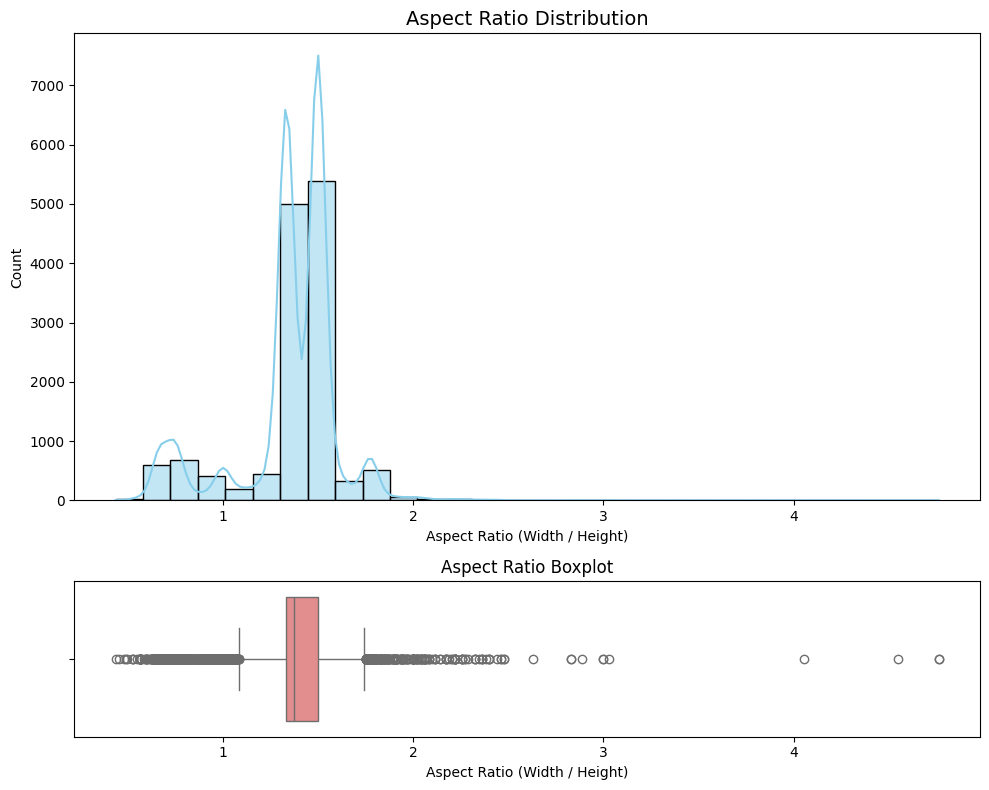

In [ ]:
# ============================================================
# ⚙️ Cấu hình phân tích tỷ lệ khung hình
# ============================================================
CONFIG = {
    "BINS": 30,                                 # Số lượng bins cho histogram
    "FIG_SIZE": (10, 8),                        # Kích thước biểu đồ tổng
    "COLORS": {                                 # Màu cho từng biểu đồ
        "hist": "skyblue",
        "box": "lightcoral"
    }
}

# ============================================================
# 📐 Tính toán và trực quan hóa Aspect Ratio
# ============================================================
# Tính tỷ lệ khung hình (Width / Height)
df_viz["Aspect_Ratio"] = df_viz["Width"] / df_viz["Height"]

# Khởi tạo figure gồm 2 hàng: histogram + boxplot
fig, axes = plt.subplots(2, 1, figsize=CONFIG["FIG_SIZE"], height_ratios=[3, 1])

# --- Biểu đồ Histogram ---
sns.histplot(
    df_viz["Aspect_Ratio"],
    bins=CONFIG["BINS"],
    kde=True,
    color=CONFIG["COLORS"]["hist"],
    ax=axes[0]
)
axes[0].set_title("Aspect Ratio Distribution", fontsize=14)
axes[0].set_xlabel("Aspect Ratio (Width / Height)")
axes[0].set_ylabel("Count")

# --- Biểu đồ Boxplot ---
sns.boxplot(
    x=df_viz["Aspect_Ratio"],
    color=CONFIG["COLORS"]["box"],
    ax=axes[1]
)
axes[1].set_title("Aspect Ratio Boxplot", fontsize=12)
axes[1].set_xlabel("Aspect Ratio (Width / Height)")
axes[1].set_ylabel("")

# Căn chỉnh bố cục
plt.tight_layout()
plt.show()

## 1.3. Phân tích đặc trưng hình ảnh
### 1.3.1. Phân tích độ sáng (Brightness Analysis)
Trong bước này, chúng ta sẽ:

-   Tính **độ sáng trung bình (Brightness)** của từng ảnh bằng cách chuyển ảnh sang thang **xám (grayscale)** và lấy **giá trị trung bình của tất cả pixel**.
    
-   Trực quan hóa **phân bố độ sáng** bằng **biểu đồ histogram** và **boxplot**, giúp xác định sự đồng đều về ánh sáng giữa các ảnh.
    
-   Kiểm tra xem có ảnh nào quá tối hoặc quá sáng bất thường (outlier) – điều này có thể ảnh hưởng đến hiệu quả huấn luyện mô hình.
    

Cấu hình có thể thay đổi:

-   `BINS`: Số lượng bins trong histogram.
    
-   `FIG_SIZE`: Kích thước biểu đồ.
    
-   `COLORS`: Màu cho histogram và boxplot.

/tmp/ipython-input-3663572260.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz["Brightness"] = df_viz["Path"].apply(get_brightness)


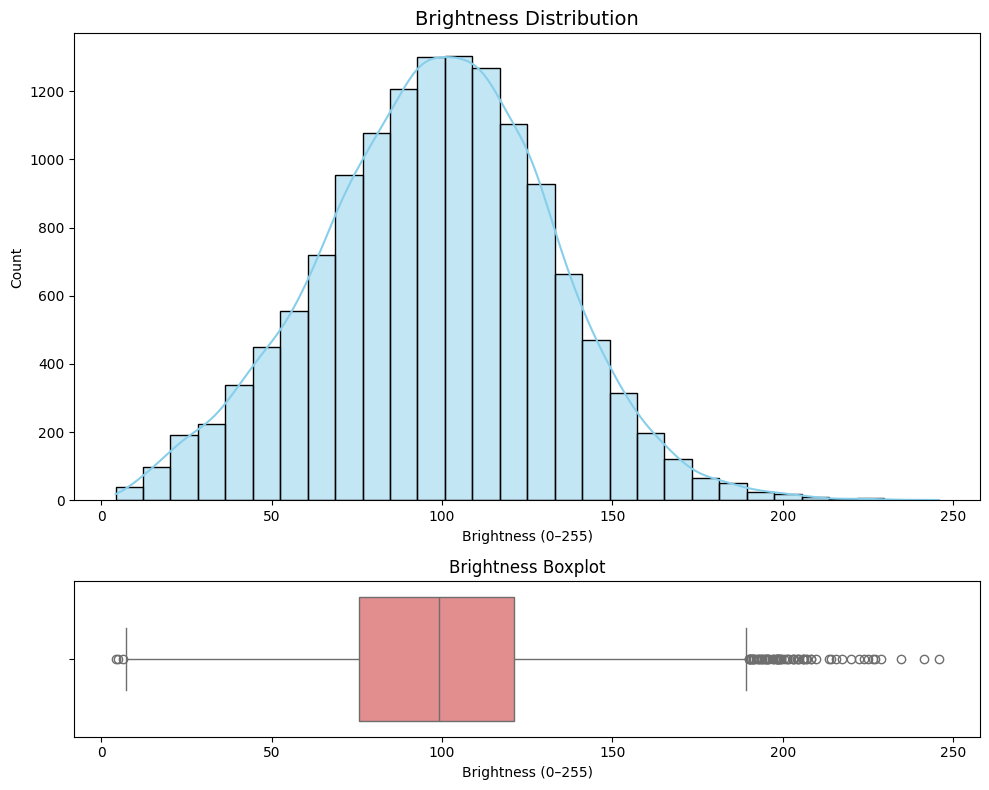

In [ ]:
# ============================================================
# ⚙️ Cấu hình phân tích độ sáng
# ============================================================
CONFIG = {
    "BINS": 30,                                 # Số lượng bins cho biểu đồ histogram
    "FIG_SIZE": (10, 8),                        # Kích thước biểu đồ
    "COLORS": {                                 # Màu sắc cho biểu đồ
        "hist": "skyblue",
        "box": "lightcoral"
    }
}

# ============================================================
# 💡 Tính toán độ sáng trung bình của từng ảnh
# ============================================================
def get_brightness(img_path):
    """
    Tính độ sáng trung bình của ảnh:
    - Chuyển ảnh sang grayscale (L)
    - Tính giá trị trung bình pixel (0-255)
    """
    with Image.open(img_path).convert("L") as img_gray:
        return np.mean(np.array(img_gray))

# Áp dụng cho toàn bộ ảnh trong df_viz
df_viz["Brightness"] = df_viz["Path"].apply(get_brightness)

# ============================================================
# 📊 Trực quan hóa phân bố độ sáng
# ============================================================
fig, axes = plt.subplots(2, 1, figsize=CONFIG["FIG_SIZE"], height_ratios=[3, 1])

# --- Histogram ---
sns.histplot(
    df_viz["Brightness"],
    bins=CONFIG["BINS"],
    kde=True,
    color=CONFIG["COLORS"]["hist"],
    ax=axes[0]
)
axes[0].set_title("Brightness Distribution", fontsize=14)
axes[0].set_xlabel("Brightness (0–255)")
axes[0].set_ylabel("Count")

# --- Boxplot ---
sns.boxplot(
    x=df_viz["Brightness"],
    color=CONFIG["COLORS"]["box"],
    ax=axes[1]
)
axes[1].set_title("Brightness Boxplot", fontsize=12)
axes[1].set_xlabel("Brightness (0–255)")
axes[1].set_ylabel("")

# Căn chỉnh bố cục
plt.tight_layout()
plt.show()

### 1.3.2. Phân tích độ tương phản (Contrast Analysis)
Trong bước này, chúng ta sẽ:

-   Tính **độ tương phản (Contrast)** của từng ảnh, được xác định bằng **độ lệch chuẩn của giá trị pixel** trong ảnh thang xám.
    
    -   Ảnh có độ lệch chuẩn cao → tương phản mạnh (nhiều chi tiết, độ sáng–tối rõ rệt).
        
    -   Ảnh có độ lệch chuẩn thấp → tương phản yếu (màu bị nhạt, khó nhận dạng biên).
        
-   Trực quan hóa **phân bố độ tương phản** để kiểm tra sự đồng đều giữa các ảnh.
    
-   Giúp đánh giá xem có cần điều chỉnh tương phản trong giai đoạn tiền xử lý hay không.
    

Cấu hình có thể thay đổi:

-   `BINS`: Số lượng bins cho histogram.
    
-   `COLOR`: Màu biểu đồ.
    
-   `FIG_SIZE`: Kích thước biểu đồ.

/tmp/ipython-input-436556478.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz["Contrast"] = df_viz["Path"].apply(get_contrast)


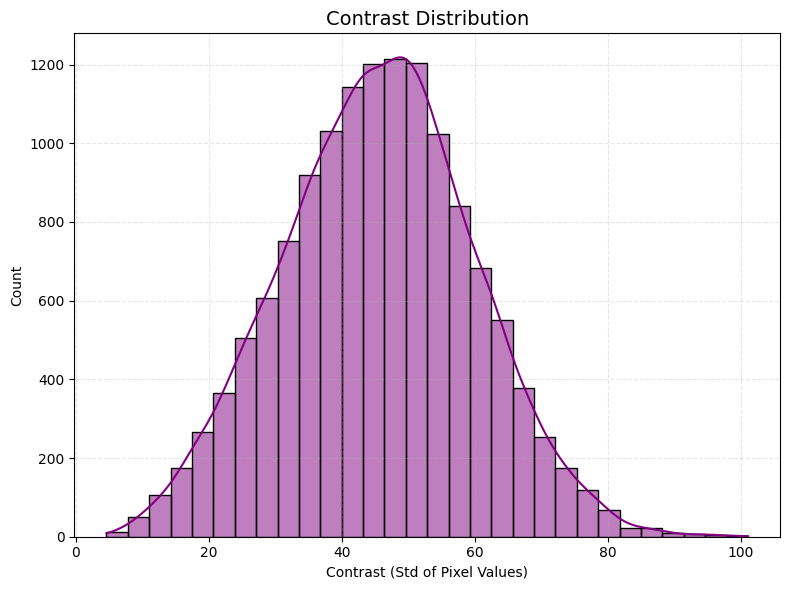

In [ ]:
# ============================================================
# ⚙️ Cấu hình phân tích độ tương phản
# ============================================================
CONFIG = {
    "BINS": 30,              # Số lượng bins cho biểu đồ histogram
    "COLOR": "purple",       # Màu biểu đồ
    "FIG_SIZE": (8, 6)       # Kích thước biểu đồ
}

# ============================================================
# 🌈 Hàm tính độ tương phản (Contrast)
# ============================================================
def get_contrast(img_path):
    """
    Tính độ tương phản của ảnh dựa trên độ lệch chuẩn (standard deviation)
    của giá trị pixel trong ảnh grayscale.
    """
    with Image.open(img_path).convert("L") as img_gray:
        return np.std(np.array(img_gray))

# Áp dụng cho toàn bộ ảnh trong df_viz
df_viz["Contrast"] = df_viz["Path"].apply(get_contrast)

# ============================================================
# 📊 Trực quan hóa phân bố độ tương phản
# ============================================================
plt.figure(figsize=CONFIG["FIG_SIZE"])

sns.histplot(
    df_viz["Contrast"],
    bins=CONFIG["BINS"],
    kde=True,
    color=CONFIG["COLOR"]
)

plt.title("Contrast Distribution", fontsize=14)
plt.xlabel("Contrast (Std of Pixel Values)")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### 1.3.3. Phân bố màu (Color Channel Distribution Analysis)
Trong bước này, chúng ta sẽ:

-   Phân tích giá trị trung bình của ba kênh màu **R (Red)**, **G (Green)** và **B (Blue)** trong từng ảnh.
    
-   Tính trung bình màu để nhận diện xu hướng chung về gam màu chiếm ưu thế trong bộ dữ liệu sinh vật biển.
    
-   Sử dụng **biểu đồ pairplot** để quan sát mối tương quan giữa các kênh màu RGB — giúp đánh giá xem ảnh có xu hướng lệch về một màu nào đó (ví dụ xanh dương của môi trường biển).
    

Cấu hình có thể thay đổi:

-   `COLOR_ORDER`: Thứ tự kênh màu mong muốn (mặc định là RGB).
    
-   `TITLE`: Tiêu đề biểu đồ.
    
-   `FIG_SIZE`: Kích thước biểu đồ.

/tmp/ipython-input-2396122003.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz[["R", "G", "B"]] = df_viz["Path"].apply(lambda p: pd.Series(get_avg_rgb(p)))
/tmp/ipython-input-2396122003.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz[["R", "G", "B"]] = df_viz["Path"].apply(lambda p: pd.Series(get_avg_rgb(p)))
/tmp/ipython-input-2396122003.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

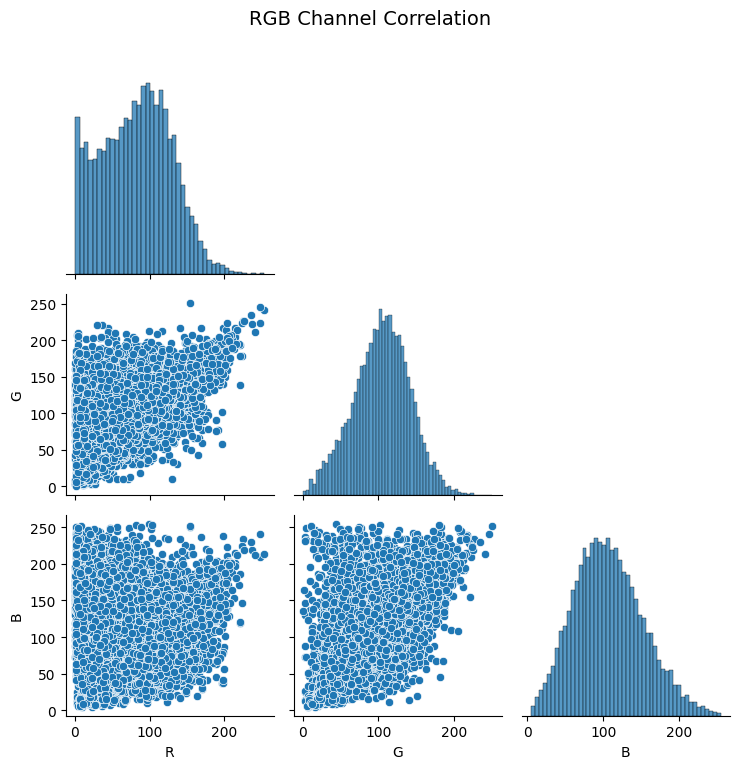

In [ ]:
# ============================================================
# ⚙️ Cấu hình phân tích kênh màu RGB
# ============================================================
CONFIG = {
    "COLOR_ORDER": "RGB",                   # Thứ tự kênh màu mong muốn
    "TITLE": "RGB Channel Correlation",     # Tiêu đề biểu đồ
    "FIG_SIZE": (8, 6)                      # Kích thước biểu đồ
}

import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 🎨 Hàm tính trung bình giá trị màu của ảnh
# ============================================================
def get_avg_rgb(img_path):
    """
    Tính giá trị trung bình của 3 kênh màu RGB trong ảnh.
    OpenCV đọc ảnh theo thứ tự BGR, cần đảo lại để đúng RGB.
    """
    img = cv2.imread(img_path)
    if img is None:
        return [0, 0, 0]
    mean_colors = img.mean(axis=(0, 1))     # Trung bình theo chiều rộng và cao (BGR)
    return mean_colors[::-1]                # Đảo ngược về RGB

# ============================================================
# 🧮 Tính trung bình RGB cho toàn bộ ảnh
# ============================================================
df_viz[["R", "G", "B"]] = df_viz["Path"].apply(lambda p: pd.Series(get_avg_rgb(p)))

# ============================================================
# 📊 Trực quan hóa mối tương quan giữa các kênh màu
# ============================================================
sns.pairplot(df_viz[["R", "G", "B"]], corner=True)
plt.suptitle(CONFIG["TITLE"], y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## 1.4. Phân tích theo lớp (Class-level Analysis)
### 1.4.1. Số lượng ảnh mỗi lớp (Class Distribution Analysis)
Trong bước này, chúng ta sẽ:

-   Thống kê **số lượng ảnh trong từng lớp sinh vật biển**.
    
-   Trực quan hóa phân bố dữ liệu giữa các lớp để kiểm tra **tính cân bằng (class balance)** của tập dữ liệu.
    
-   Phát hiện các lớp có số lượng ảnh vượt trội hoặc thiếu hụt để định hướng chiến lược **augmentation hoặc weighting** trong quá trình huấn luyện.
    

Cấu hình có thể thay đổi:

-   `BAR_COLOR`: Màu của cột trong biểu đồ.
    
-   `FIG_SIZE`: Kích thước biểu đồ.
    
-   `ROTATION`: Góc xoay nhãn lớp để dễ đọc.
    
-   `TITLE`: Tiêu đề biểu đồ.

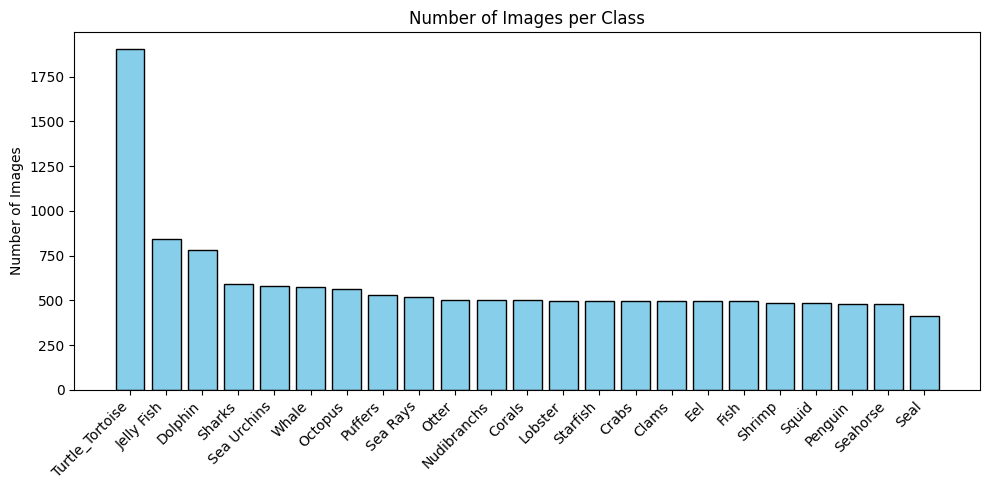

In [ ]:
# ============================================================
# ⚙️ Cấu hình trực quan phân bố lớp
# ============================================================
CONFIG = {
    "BAR_COLOR": "skyblue",                      # Màu cột
    "EDGE_COLOR": "black",                       # Màu viền cột
    "FIG_SIZE": (10, 5),                         # Kích thước biểu đồ
    "ROTATION": 45,                              # Góc xoay nhãn lớp
    "TITLE": "Number of Images per Class"         # Tiêu đề biểu đồ
}

import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
# 🧮 Thống kê số lượng ảnh theo lớp
# ============================================================
class_counts = (
    df_img.groupby("Class")
    .size()
    .reset_index(name="Num_Images")               # Đổi tên cột kết quả
    .sort_values(by="Num_Images", ascending=False)
    .reset_index(drop=True)
)

# ============================================================
# 📊 Vẽ biểu đồ cột số lượng ảnh mỗi lớp
# ============================================================
plt.figure(figsize=CONFIG["FIG_SIZE"])
plt.bar(
    class_counts["Class"],
    class_counts["Num_Images"],
    color=CONFIG["BAR_COLOR"],
    edgecolor=CONFIG["EDGE_COLOR"]
)
plt.xticks(rotation=CONFIG["ROTATION"], ha="right")
plt.ylabel("Number of Images")
plt.title(CONFIG["TITLE"])
plt.tight_layout()
plt.show()

### 1.4.2. Độ sáng theo lớp (Brightness per Class Analysis)
Phần này nhằm:

-   So sánh **độ sáng trung bình** của ảnh giữa các lớp sinh vật biển.
    
-   Xác định xem có lớp nào có ảnh **quá tối hoặc quá sáng** — yếu tố có thể ảnh hưởng đến việc trích xuất đặc trưng (feature extraction) và chất lượng nhận diện của mô hình CNN.
    

Cấu hình có thể điều chỉnh:

-   `FIG_SIZE`: Kích thước hình.
    
-   `ROTATION`: Góc xoay nhãn lớp để dễ đọc.
    
-   `TITLE`: Tiêu đề biểu đồ.

/tmp/ipython-input-2520531383.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


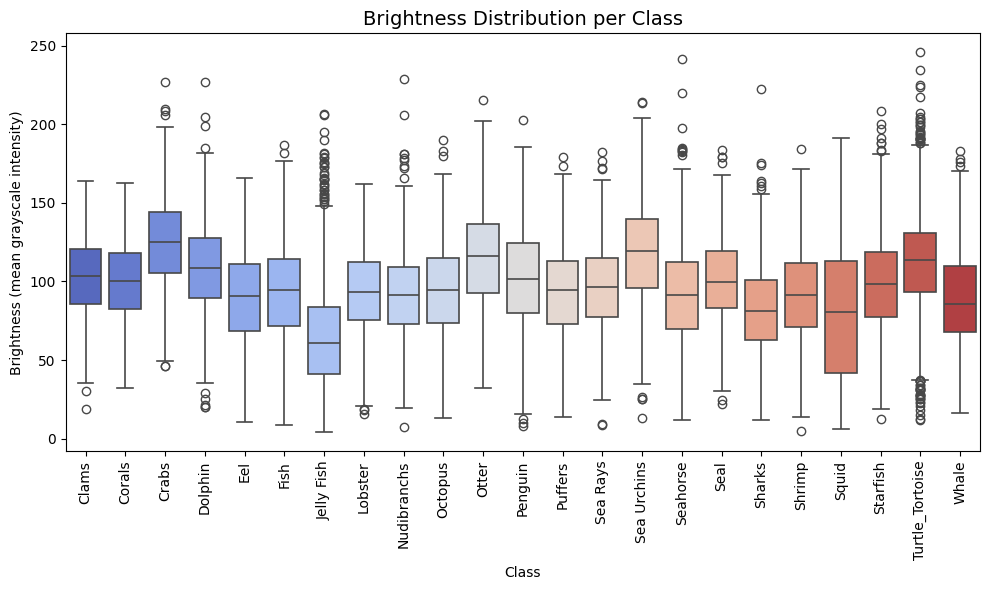

In [ ]:
# ============================================================
# ⚙️ Cấu hình trực quan độ sáng theo lớp
# ============================================================
CONFIG = {
    "FIG_SIZE": (10, 6),                          # Kích thước hình
    "ROTATION": 90,                               # Xoay nhãn lớp
    "TITLE": "Brightness Distribution per Class"  # Tiêu đề biểu đồ
}

import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 📊 Boxplot: Phân bố độ sáng theo từng lớp
# ============================================================
plt.figure(figsize=CONFIG["FIG_SIZE"])
sns.boxplot(
    x="Class",
    y="Brightness",
    data=df_viz,
    palette="coolwarm",                           # Màu biểu đồ
    linewidth=1.2
)

plt.xticks(rotation=CONFIG["ROTATION"])
plt.title(CONFIG["TITLE"], fontsize=14)
plt.xlabel("Class")
plt.ylabel("Brightness (mean grayscale intensity)")
plt.tight_layout()
plt.show()

### 1.4.3. Tỷ lệ khung hình (Aspect Ratio) theo lớp
Phần này nhằm:

-   Kiểm tra **độ đồng đều tỷ lệ khung hình (Width/Height)** giữa các lớp sinh vật biển.
    
-   Xác định xem có lớp nào có hình ảnh **dài hoặc vuông bất thường**, từ đó đánh giá mức cần thiết của bước **chuẩn hóa kích thước ảnh** trước huấn luyện mô hình.

Cấu hình có thể thay đổi:

-   `FIG_SIZE`: Kích thước biểu đồ.
    
-   `ROTATION`: Góc xoay nhãn lớp.
    
-   `TITLE`: Tiêu đề biểu đồ.

Max/Min class size ratio: 4.60


/tmp/ipython-input-2650901475.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


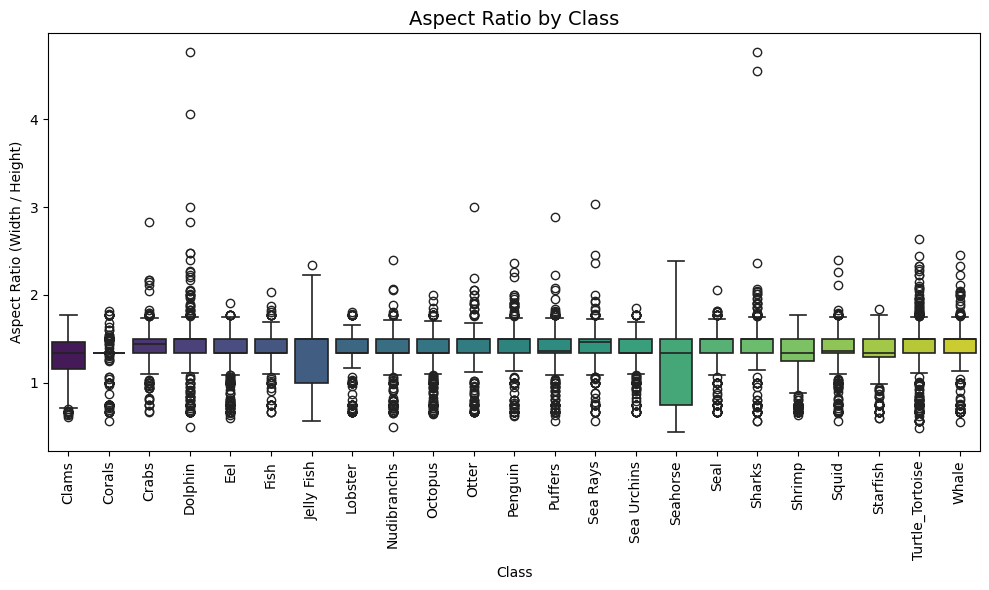

In [ ]:
# ============================================================
# ⚙️ Cấu hình hiển thị tỷ lệ khung hình theo lớp
# ============================================================
CONFIG = {
    "FIG_SIZE": (10, 6),
    "ROTATION": 90,
    "TITLE": "Aspect Ratio by Class"
}

# ============================================================
# 📊 Thống kê số lượng ảnh mỗi lớp (độ chênh lệch kích thước tập)
# ============================================================
class_summary = df_viz["Class"].value_counts()
print(f"Max/Min class size ratio: {class_summary.max()/class_summary.min():.2f}")

# ============================================================
# 📈 Biểu đồ Boxplot: Phân bố tỷ lệ khung hình theo từng lớp
# ============================================================
plt.figure(figsize=CONFIG["FIG_SIZE"])
sns.boxplot(
    x="Class",
    y="Aspect_Ratio",
    data=df_viz,
    palette="viridis",
    linewidth=1.2
)

plt.xticks(rotation=CONFIG["ROTATION"])
plt.title(CONFIG["TITLE"], fontsize=14)
plt.xlabel("Class")
plt.ylabel("Aspect Ratio (Width / Height)")
plt.tight_layout()
plt.show()

### 1.4.4. Màu sắc trung bình theo lớp
Trong bước này, chúng ta sẽ:

-   Tính giá trị trung bình của ba kênh màu **R**, **G**, **B** cho từng lớp ảnh.
    
-   Quan sát sự khác biệt màu sắc đặc trưng giữa các loài sinh vật biển.
    

Cấu hình có thể thay đổi:

-   `FIG_SIZE`: Kích thước biểu đồ.
    
-   `ROTATION`: Góc xoay nhãn lớp.
    
-   `TITLE`: Tiêu đề biểu đồ.

<Figure size 1000x600 with 0 Axes>

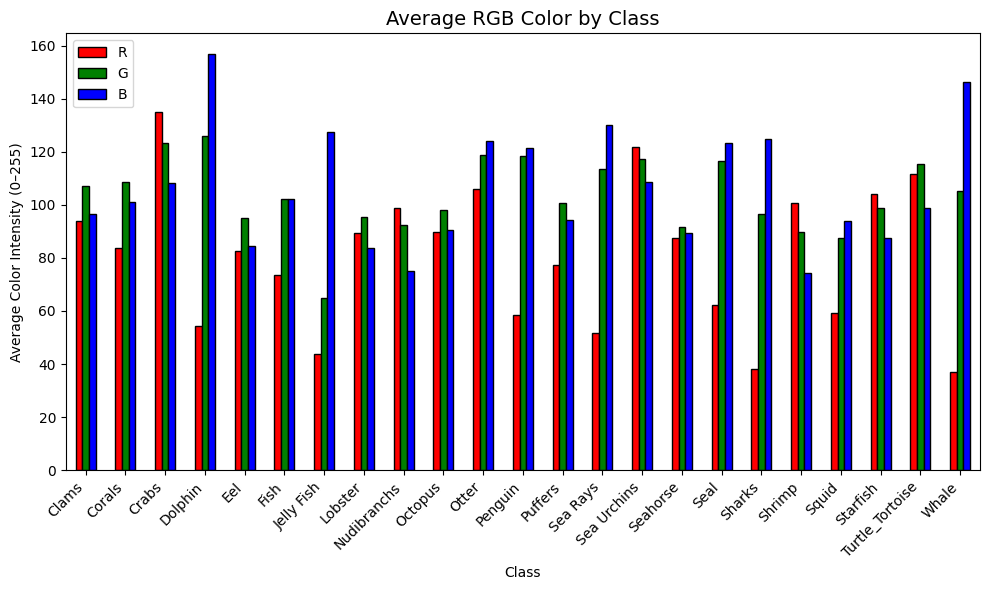

In [ ]:
# ============================================================
# ⚙️ Cấu hình hiển thị màu sắc trung bình theo lớp
# ============================================================
CONFIG = {
    "FIG_SIZE": (10, 6),
    "ROTATION": 45,
    "TITLE": "Average RGB Color by Class"
}

# ============================================================
# 🎨 Tính màu trung bình theo từng lớp
# ============================================================
rgb_mean_by_class = (
    df_viz.groupby("Class")[["R", "G", "B"]]
    .mean()
    .reset_index()
    .sort_values("Class")
)

# ============================================================
# 📊 Vẽ biểu đồ cột: Màu trung bình theo lớp
# ============================================================
plt.figure(figsize=CONFIG["FIG_SIZE"])
rgb_mean_by_class.plot(
    x="Class",
    kind="bar",
    figsize=CONFIG["FIG_SIZE"],
    color=["red", "green", "blue"],
    edgecolor="black"
)

plt.title(CONFIG["TITLE"], fontsize=14)
plt.xticks(rotation=CONFIG["ROTATION"], ha="right")
plt.ylabel("Average Color Intensity (0–255)")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# **2. Tiền xử lý dữ liệu**
## 2.1. Chia tập dữ liệu
Trong bước này, chúng ta sẽ:

-   Chia bộ dữ liệu ảnh thành hai phần: **train (80%)** và **test (20%)**.
    
-   Đảm bảo **phân bố lớp đồng đều** giữa hai tập bằng phương pháp **stratified split**.
    
-   Giữ cố định **random state** để đảm bảo khả năng tái lập kết quả.
    

Cấu hình có thể thay đổi:

-   `TEST_SIZE`: Tỷ lệ dữ liệu dành cho tập kiểm thử.
    
-   `RANDOM_STATE`: Hạt giống ngẫu nhiên giúp tái lập kết quả.
    
-   `STRATIFY_COL`: Cột dùng để phân tầng dữ liệu khi chia tập.

In [ ]:
# ============================================================
# ⚙️ Cấu hình chia tập dữ liệu
# ============================================================
CONFIG = {
    "TEST_SIZE": 0.2,              # 20% dữ liệu cho tập kiểm thử
    "RANDOM_STATE": 42,            # Giữ cố định để tái lập kết quả
    "STRATIFY_COL": "Class"        # Chia dữ liệu theo phân bố lớp
}

# ============================================================
# 📂 Thực hiện chia dữ liệu Train/Test
# ============================================================
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df_img,
    test_size=CONFIG["TEST_SIZE"],
    stratify=df_img[CONFIG["STRATIFY_COL"]],
    random_state=CONFIG["RANDOM_STATE"]
)

# ============================================================
# 📊 Kết quả chia tập
# ============================================================
print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

Train size: 10968
Test size: 2743


## 2.2. Chuẩn hóa kích thước và tỷ lệ khung hình
Trong bước này, ta thực hiện các thao tác chuẩn hóa nhằm đảm bảo mọi ảnh trong tập dữ liệu có cùng kích thước và tỷ lệ khung hình trước khi đưa vào mô hình học sâu. Cụ thể:

-   Chuyển tất cả ảnh về định dạng **RGB (3 kênh)**.
    
-   Áp dụng **padding** để đưa ảnh về khung **vuông** mà không làm biến dạng đối tượng.
    
-   Resize toàn bộ ảnh về kích thước **224×224 pixels** — chuẩn đầu vào cho các mô hình như **ResNet** hoặc **EfficientNet**.
    
-   Tăng nhẹ **độ sáng và tương phản (+10%)** để làm nổi bật chi tiết.
    

Cấu hình có thể thay đổi:

-   `IMG_SIZE`: Kích thước ảnh sau khi resize.
    
-   `ENHANCE_BRIGHTNESS`: Mức tăng độ sáng.
    
-   `ENHANCE_CONTRAST`: Mức tăng độ tương phản.
    
-   `OUTPUT_DIR`: Thư mục lưu ảnh sau xử lý.

In [ ]:
# ============================================================
# ⚙️ Cấu hình chuẩn hóa kích thước và khung hình
# ============================================================
CONFIG = {
    "IMG_SIZE": (224, 224),
    "ENHANCE_BRIGHTNESS": 1.1,
    "ENHANCE_CONTRAST": 1.1,
    "OUTPUT_DIR": "processed"
}

from PIL import Image, ImageOps, ImageEnhance
from tqdm import tqdm

# ============================================================
# 🧩 Hàm xử lý và lưu ảnh theo từng tập (train/test)
# ============================================================
def process_and_save(df, split_name):
    output_root = os.path.join(CONFIG["OUTPUT_DIR"], split_name)
    os.makedirs(output_root, exist_ok=True)

    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Processing {split_name} set"):
        try:
            img = Image.open(row["Path"]).convert("RGB")

            # --- Padding để tạo ảnh vuông ---
            img = ImageOps.pad(img, (max(img.size), max(img.size)), color=(0, 0, 0))

            # --- Resize về kích thước chuẩn ---
            img = img.resize(CONFIG["IMG_SIZE"])

            # --- Tăng cường độ sáng & tương phản ---
            img = ImageEnhance.Brightness(img).enhance(CONFIG["ENHANCE_BRIGHTNESS"])
            img = ImageEnhance.Contrast(img).enhance(CONFIG["ENHANCE_CONTRAST"])

            # --- Lưu ảnh đã xử lý ---
            class_dir = os.path.join(output_root, str(row["Class"]))
            os.makedirs(class_dir, exist_ok=True)
            save_path = os.path.join(class_dir, row["Image_Name"])
            img.save(save_path, quality=95)

        except Exception as e:
            print(f"⚠️ Error processing {row['Path']}: {e}")

    print(f"✅ Done! Processed images saved to: {output_root}")

# ============================================================
# 🚀 Thực thi xử lý cho cả tập train và test
# ============================================================
process_and_save(train_df, "train")
process_and_save(test_df, "test")

Processing train set: 100%|██████████| 10968/10968 [00:57<00:00, 190.90it/s]


✅ Done! Processed images saved to: processed/train


Processing test set: 100%|██████████| 2743/2743 [00:14<00:00, 193.70it/s]

✅ Done! Processed images saved to: processed/test


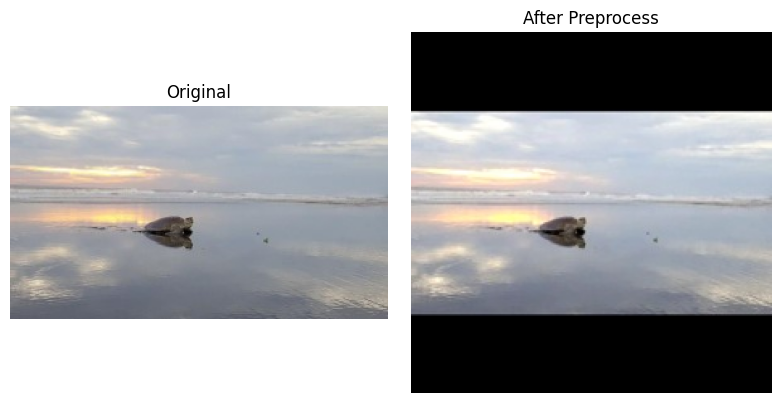

In [ ]:
# ============================================================
# 🔍 Hiển thị ảnh trước và sau khi xử lý
# ============================================================
sample_row = train_df.sample(1).iloc[0]
original_path = sample_row["Path"]
processed_path = os.path.join(CONFIG["OUTPUT_DIR"], "train", sample_row["Class"], sample_row["Image_Name"])

orig_img = Image.open(original_path).convert("RGB")
proc_img = Image.open(processed_path).convert("RGB")

# So sánh trực quan
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(orig_img)
axes[0].set_title("Original")
axes[1].imshow(proc_img)
axes[1].set_title("After Preprocess")
for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()

## 2.3. Tăng cường chất lượng và tính đa dạng của dữ liệu
Sau khi chuẩn hóa kích thước và tỷ lệ khung hình, ta tiếp tục thực hiện **tăng cường chất lượng và tính đa dạng của dữ liệu** thông qua các phép biến đổi ảnh.  
Mục tiêu của bước này là giúp mô hình học sâu **khả năng tổng quát hóa tốt hơn**, giảm hiện tượng **overfitting** và tăng độ bền vững với các thay đổi nhỏ trong ảnh thực tế.

Cụ thể:

-   Tập **train** được áp dụng các phép **data augmentation** ngẫu nhiên:
    
    -   Lật ngang ảnh (RandomHorizontalFlip)
        
    -   Xoay nhẹ trong khoảng ±15° (RandomRotation)
        
    -   Cắt & phóng to ngẫu nhiên (RandomResizedCrop)
        
    -   Điều chỉnh ánh sáng, tương phản, độ bão hòa (ColorJitter)
        
-   Tập **test** chỉ được **resize + normalize** để đảm bảo kết quả đánh giá ổn định.
    

Cấu hình có thể thay đổi:

-   `IMG_SIZE`: Kích thước ảnh đầu vào mô hình.
    
-   `BATCH_SIZE`: Số lượng ảnh trong mỗi batch huấn luyện.
    
-   `ROTATION_DEG`: Góc xoay ngẫu nhiên.
    
-   `COLOR_JITTER`: Mức thay đổi độ sáng, tương phản, bão hòa.

In [ ]:
# ============================================================
# ⚙️ Cấu hình tăng cường dữ liệu và tạo DataLoader
# ============================================================
CONFIG = {
    "IMG_SIZE": (224, 224),
    "BATCH_SIZE": 32,
    "ROTATION_DEG": 15,
    "COLOR_JITTER": {
        "brightness": 0.1,
        "contrast": 0.1,
        "saturation": 0.1
    },
    "MEAN": [0.485, 0.456, 0.406],
    "STD": [0.229, 0.224, 0.225]
}

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ============================================================
# 🧩 Định nghĩa các phép biến đổi cho train & test
# ============================================================
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),                                  # Lật ngang
    transforms.RandomRotation(degrees=CONFIG["ROTATION_DEG"]),               # Xoay ±15°
    transforms.RandomResizedCrop(CONFIG["IMG_SIZE"][0], scale=(0.8, 1.0)),   # Cắt & phóng
    transforms.ColorJitter(**CONFIG["COLOR_JITTER"]),                         # Tăng cường màu
    transforms.ToTensor(),
    transforms.Normalize(mean=CONFIG["MEAN"], std=CONFIG["STD"])             # Chuẩn hóa theo ImageNet
])

test_transforms = transforms.Compose([
    transforms.Resize(CONFIG["IMG_SIZE"]),
    transforms.ToTensor(),
    transforms.Normalize(mean=CONFIG["MEAN"], std=CONFIG["STD"])
])

# ============================================================
# 📂 Tạo Dataset & DataLoader
# ============================================================
train_dataset = datasets.ImageFolder("processed/train", transform=train_transforms)
test_dataset = datasets.ImageFolder("processed/test", transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=CONFIG["BATCH_SIZE"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=CONFIG["BATCH_SIZE"], shuffle=False)

print(f"✅ Train samples: {len(train_dataset)} | Test samples: {len(test_dataset)}")

✅ Train samples: 10968 | Test samples: 2743


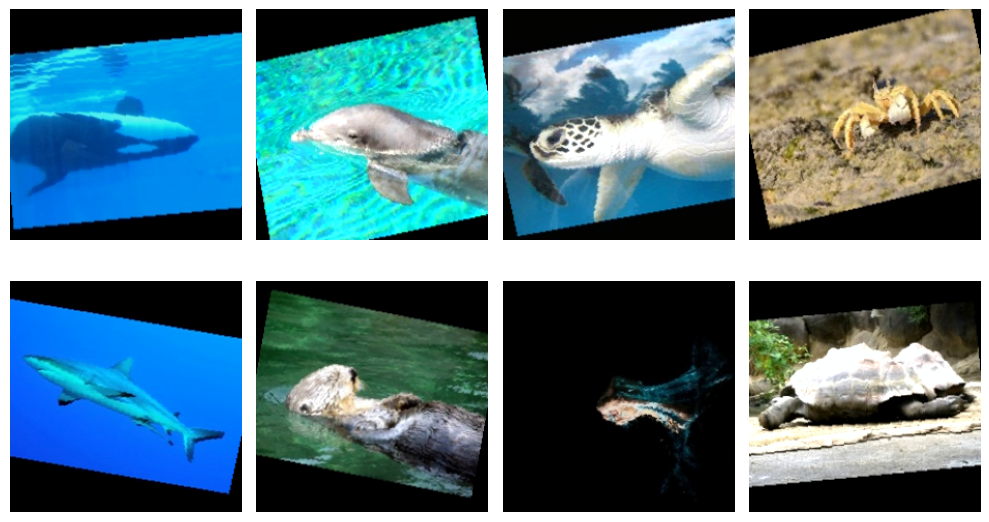

In [ ]:
# ============================================================
# 🔍 Hiển thị ví dụ ảnh augment từ DataLoader
# ============================================================
import matplotlib.pyplot as plt
import numpy as np

def imshow(img_tensor):
    """Hàm hiển thị ảnh tensor (đã được unnormalize)."""
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = img * np.array(CONFIG["STD"]) + np.array(CONFIG["MEAN"])  # Unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis("off")

# Lấy batch ngẫu nhiên từ train loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Hiển thị 8 ảnh đầu tiên
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    imshow(images[i])
plt.tight_layout()
plt.show()

# **3. Trích xuất đặc trưng**

Trong bước này, chúng ta sẽ:

- Trích xuất **đặc trưng (features)** từ ảnh bằng các mô hình học sâu (Deep Learning) đã huấn luyện trước trên ImageNet.  
- Sử dụng hai hướng tiếp cận:
  - **CNN-based models:** ResNet50 và EfficientNetB0.
  - **Transformer-based models:** ViT (Vision Transformer) và có thể mở rộng sang Swin Transformer.
- Lưu đặc trưng đã trích xuất thành các file `.h5` để phục vụ cho huấn luyện mô hình phân loại giai đoạn sau.

Cấu hình có thể thay đổi:

- `DATA_DIR`: Thư mục chứa dữ liệu đã được tiền xử lý (thông thường có cấu trúc `/train` và `/test`).  
- `OUTPUT_DIR`: Thư mục nơi lưu trữ các file đặc trưng trích xuất được.  
- `USE_EXTRACTED_FEATURES`: Cờ bật/tắt quá trình trích xuất đặc trưng.  
- `transformers_list`: Danh sách các mô hình Transformer dùng để trích xuất (có thể mở rộng thêm).  



In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

import h5py
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import (
    VGG16, ResNet50, EfficientNetB0
)
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet import preprocess_input as res_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre

from transformers import ViTFeatureExtractor, ViTModel, SwinModel, AutoImageProcessor

In [ ]:
# ============================================================
# ⚙️ Cấu hình trích xuất đặc trưng
# ============================================================

CONFIG = {
    "DATA_DIR": "/content/processed",     # Thư mục chứa ảnh đã preprocess
    "OUTPUT_DIR": "/content/features",    # Thư mục lưu đặc trưng đầu ra
    "USE_EXTRACTED_FEATURES": False,       # Bật/Tắt trích xuất đặc trưng
}
os.makedirs(CONFIG["OUTPUT_DIR"], exist_ok=True)

In [ ]:
# ============================================================
# 📦 Hàm trích xuất đặc trưng bằng CNN (ResNet50, EfficientNetB0)
# ============================================================

def extract_features_keras(model, preprocess_func, data_dir, input_size=(224, 224)):
    """
    Trích xuất đặc trưng ảnh bằng mô hình CNN từ TensorFlow/Keras.
    - model: mô hình pretrained
    - preprocess_func: hàm tiền xử lý ảnh phù hợp với model
    - data_dir: đường dẫn chứa ảnh của các lớp
    """
    features, labels = [], []
    for cls in sorted(os.listdir(data_dir)):
        cls_path = os.path.join(data_dir, cls)
        if not os.path.isdir(cls_path):
            continue

        # Duyệt qua từng ảnh trong lớp
        for img_name in tqdm(os.listdir(cls_path), desc=f"Extracting {cls}"):
            img_path = os.path.join(cls_path, img_name)
            img = image.load_img(img_path, target_size=input_size)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_func(x)
            feat = model.predict(x, verbose=0)
            features.append(feat.squeeze())
            labels.append(cls)

    return np.array(features), np.array(labels)

In [ ]:
def extract_cnn_features():
    """Trích xuất đặc trưng bằng các mô hình CNN phổ biến."""
    backbones = {
        # "VGG16": (VGG16(weights="imagenet", include_top=False, pooling="avg"), vgg_pre),
        "ResNet50": (ResNet50(weights="imagenet", include_top=False, pooling="avg"), res_pre),
        "EfficientNetB0": (EfficientNetB0(weights="imagenet", include_top=False, pooling="avg"), eff_pre),
    }

    for name, (model, pre_func) in backbones.items():
        print(f"\n🔹 Extracting features with {name}...")
        train_features, train_labels = extract_features_keras(model, pre_func, os.path.join(CONFIG["DATA_DIR"], "train"))
        test_features, test_labels = extract_features_keras(model, pre_func, os.path.join(CONFIG["DATA_DIR"], "test"))

        # Lưu đặc trưng ra file .h5
        out_path = os.path.join(CONFIG["OUTPUT_DIR"], f"{name.lower()}_features.h5")
        with h5py.File(out_path, "w") as f:
            f.create_dataset("train_features", data=train_features)
            f.create_dataset("train_labels", data=train_labels.astype("S"))
            f.create_dataset("test_features", data=test_features)
            f.create_dataset("test_labels", data=test_labels.astype("S"))
        print(f"✅ Saved {name} features → {out_path}")

In [ ]:
# ============================================================
# 🤗 Hàm trích xuất đặc trưng bằng Transformer (ViT, Swin)
# ============================================================

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def extract_transformer_features(model_name):
    """Trích xuất đặc trưng bằng mô hình Transformer (ViT hoặc Swin)."""
    all_features = {"train": [], "test": []}
    all_labels = {"train": [], "test": []}

    for split in ["train", "test"]:
        data_dir_split = os.path.join(CONFIG["DATA_DIR"], split)
        print(f"\n🔹 Processing {model_name} - {split}")
        processor = AutoImageProcessor.from_pretrained(model_name)
        model = (
            ViTModel.from_pretrained(model_name)
            if "vit" in model_name.lower()
            else SwinModel.from_pretrained(model_name)
        ).to(device)
        model.eval()

        # Duyệt qua từng lớp và ảnh để trích xuất đặc trưng
        for cls in sorted(os.listdir(data_dir_split)):
            cls_path = os.path.join(data_dir_split, cls)
            if not os.path.isdir(cls_path):
                continue
            for img_name in tqdm(os.listdir(cls_path), desc=f"{cls}"):
                img_path = os.path.join(cls_path, img_name)
                image_pil = Image.open(img_path).convert("RGB")
                inputs = processor(images=image_pil, return_tensors="pt").to(device)

                with torch.no_grad():
                    outputs = model(**inputs)
                    feat = outputs.pooler_output.squeeze().cpu().numpy() \
                        if hasattr(outputs, "pooler_output") else outputs.last_hidden_state[:,0,:].squeeze().cpu().numpy()
                all_features[split].append(feat)
                all_labels[split].append(cls)

    # Lưu đặc trưng Transformer ra file .h5
    out_path = os.path.join(CONFIG["OUTPUT_DIR"], f"{model_name.split('/')[-1]}_features.h5")
    with h5py.File(out_path, "w") as f:
        f.create_dataset("train_features", data=np.array(all_features["train"]))
        f.create_dataset("train_labels", data=np.array(all_labels["train"]).astype("S"))
        f.create_dataset("test_features", data=np.array(all_features["test"]))
        f.create_dataset("test_labels", data=np.array(all_labels["test"]).astype("S"))
    print(f"✅ Saved {model_name} unified features → {out_path}")

In [ ]:
def extract_transformers():
    """Trích xuất đặc trưng bằng danh sách các mô hình Transformer cấu hình sẵn."""
    transformers_list = [
        "google/vit-base-patch16-224",
        # "microsoft/swin-tiny-patch4-window7-224"  # có thể bật thêm nếu cần
    ]
    for model_name in transformers_list:
        extract_transformer_features(model_name)

In [ ]:
# ============================================================
# 🚀 Thực thi toàn bộ pipeline trích xuất đặc trưng
# ============================================================

if CONFIG["USE_EXTRACTED_FEATURES"]:
    extract_cnn_features()
    extract_transformers()

print("\n🎉 All features extracted and saved successfully!")


🎉 All features extracted and saved successfully!


# **4. Train - evaluation**

Trong bước này, chúng ta sẽ:

- Huấn luyện và đánh giá **các mô hình học máy truyền thống** dựa trên các đặc trưng đã trích xuất từ bước trước (CNN / Transformer).  
- So sánh hiệu suất giữa các mô hình khác nhau trên từng loại đặc trưng.  
- Trực quan hóa **ma trận nhầm lẫn (Confusion Matrix)** để hiểu rõ khả năng phân loại của từng mô hình.

Các mô hình được sử dụng:

- **Logistic Regression** (Tuyến tính): Mô hình phân loại tuyến tính đơn giản, hiệu quả cho dữ liệu có tách rời rõ ràng.
- **Linear SVM** (Kernel-based): Dựa trên siêu phẳng tối ưu, cân bằng tốt giữa bias và variance.
- **Random Forest** (Ensemble): Tập hợp nhiều cây quyết định, mạnh mẽ với dữ liệu phức tạp.

Cấu hình có thể thay đổi:
- `OUTPUT_DIR`: Thư mục chứa các file `.h5` đặc trưng đầu vào.
- `FEATURES_TO_USE`: Danh sách các loại đặc trưng cần đánh giá (có thể mở rộng thêm).
- `models`: Danh sách mô hình học máy được huấn luyện và so sánh (có thể mở rộng thêm).


=== 🔹 Feature: resnet50 ===
Loaded shapes: (10968, 2048) (2743, 2048)
→ Training Logistic Regression ...


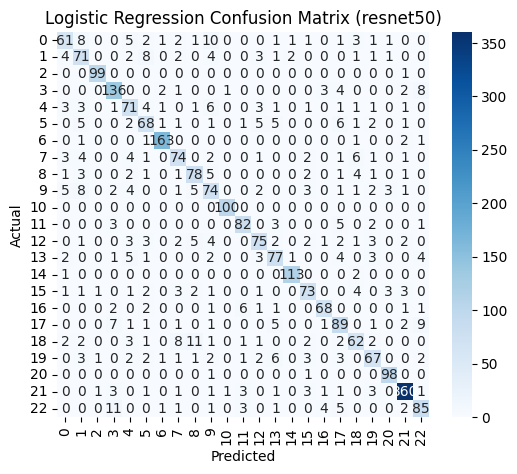

→ Training Linear SVM ...


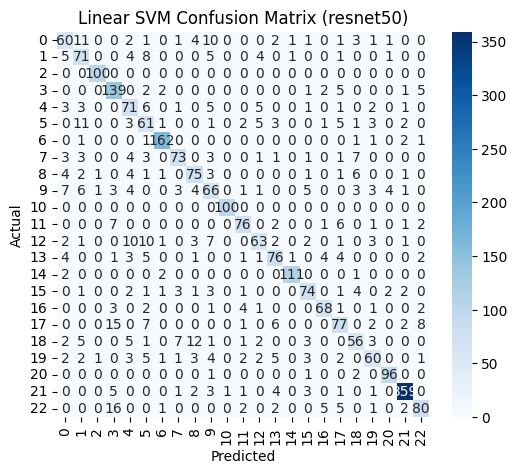

→ Training Random Forest ...


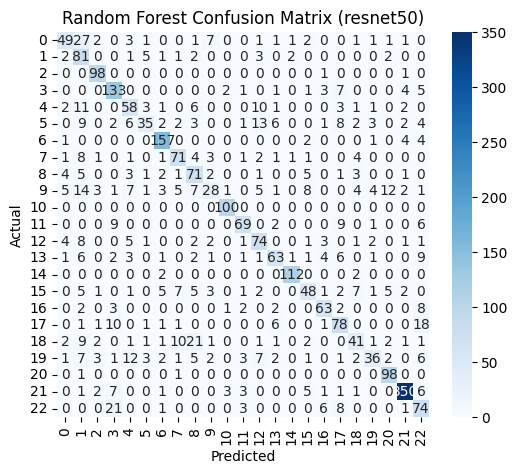


=== 🔹 Feature: efficientnetb0 ===
Loaded shapes: (10968, 1280) (2743, 1280)
→ Training Logistic Regression ...


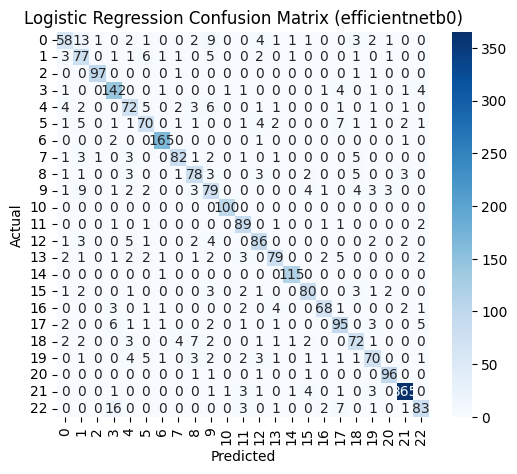

→ Training Linear SVM ...


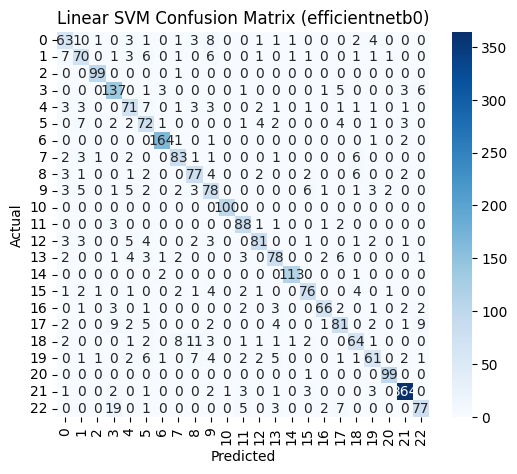

→ Training Random Forest ...


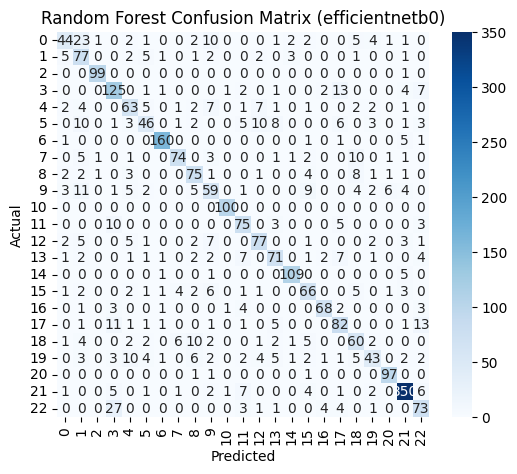


=== 🔹 Feature: vit-base-patch16-224 ===
Loaded shapes: (10968, 768) (2743, 768)
→ Training Logistic Regression ...


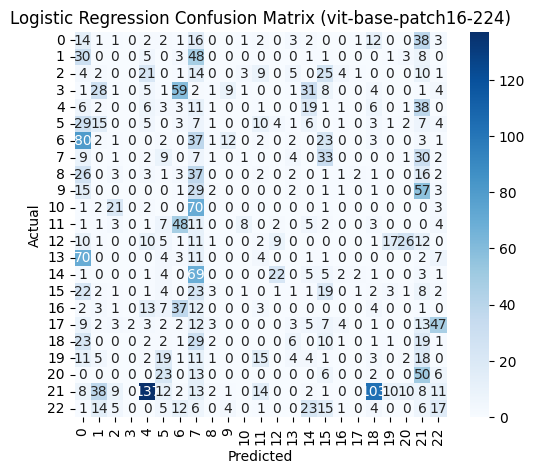

→ Training Linear SVM ...


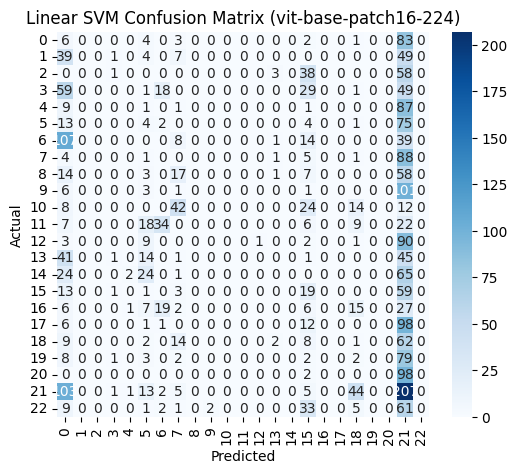

→ Training Random Forest ...


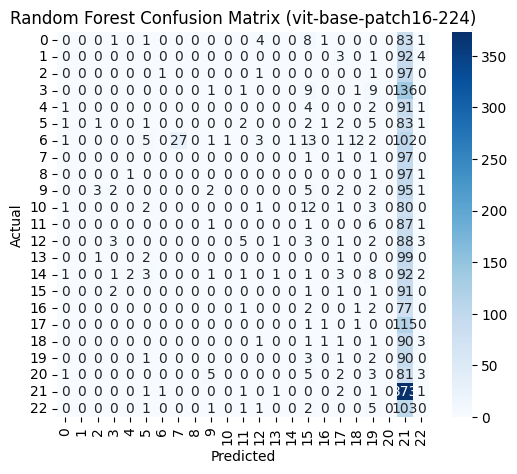

Feature,Model,Accuracy,Precision,Recall,F1-score
resnet50,Logistic Regression,0.818082,0.817984,0.818082,0.817421
resnet50,Linear SVM,0.792563,0.795196,0.792563,0.792197
resnet50,Random Forest,0.724389,0.731327,0.724389,0.716138
efficientnetb0,Logistic Regression,0.845060,0.846441,0.845060,0.844484
efficientnetb0,Linear SVM,0.824645,0.825629,0.824645,0.823865
efficientnetb0,Random Forest,0.763033,0.765923,0.763033,0.760339
vit-base-patch16-224,Logistic Regression,0.031353,0.027503,0.031353,0.025661
vit-base-patch16-224,Linear SVM,0.086766,0.061570,0.086766,0.036227
vit-base-patch16-224,Random Forest,0.138170,0.031863,0.138170,0.040008


Metric,Best Model,Feature,Best Score
Accuracy,Logistic Regression,efficientnetb0,0.845060
Precision,Logistic Regression,efficientnetb0,0.846441
Recall,Logistic Regression,efficientnetb0,0.845060
F1-score,Logistic Regression,efficientnetb0,0.844484


In [ ]:
# ================================
# 5. Train & Evaluation
# ================================

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ============================================================
# ⚙️ Cấu hình huấn luyện và đánh giá
# ============================================================

CONFIG = {
    "OUTPUT_DIR": "/content/features",  # Nơi chứa các file đặc trưng .h5
    "FEATURES_TO_USE": [
        "resnet50",
        "efficientnetb0",
        "vit-base-patch16-224"
    ],
}

# ============================================================
# 🔧 Khởi tạo danh sách mô hình
# ============================================================

models = {
    "Logistic Regression": LogisticRegression(
        C=0.1, class_weight="balanced", solver="liblinear", max_iter=1000, random_state=42
    ),
    "Linear SVM": SVC(
        kernel='linear', class_weight='balanced', probability=True, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=10, class_weight='balanced', random_state=42
    ),
}

# ============================================================
# 📂 Hàm tải đặc trưng từ file .h5
# ============================================================

def smart_load_feature(feature_name, split):
    """
    Load đặc trưng từ OUTPUT_DIR/{feature_name}_features.h5.
    split: 'train' hoặc 'test'.
    Trả về: X (np.array), y (np.array of str)
    """
    file_path = os.path.join(CONFIG["OUTPUT_DIR"], f"{feature_name.lower()}_features.h5")
    with h5py.File(file_path, "r") as f:
        X = np.array(f[f"{split}_features"])
        y = np.array(f[f"{split}_labels"]).astype(str)
    return X, y

# ============================================================
# 🚀 Hàm huấn luyện và đánh giá mô hình
# ============================================================

results = []

def train_eval(feature_name):
    """Huấn luyện và đánh giá các mô hình trên đặc trưng chỉ định."""
    print(f"\n=== 🔹 Feature: {feature_name} ===")

    # Tải dữ liệu
    X_train, y_train = smart_load_feature(feature_name, "train")
    X_test, y_test = smart_load_feature(feature_name, "test")
    print("Loaded shapes:", X_train.shape, X_test.shape)

    # Huấn luyện từng mô hình
    for name, clf in models.items():
        print(f"→ Training {name} ...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Tính toán các chỉ số đánh giá
        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Lưu kết quả
        results.append({
            "Feature": feature_name,
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })

        # Hiển thị ma trận nhầm lẫn
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{name} Confusion Matrix ({feature_name})")
        plt.show()

    # Dọn bộ nhớ
    del X_train, X_test, y_train, y_test
    gc.collect()

# ============================================================
# 🧾 Chạy đánh giá cho tất cả đặc trưng
# ============================================================

for feat in CONFIG["FEATURES_TO_USE"]:
    try:
        train_eval(feat)
    except Exception as e:
        print(f"⚠️ Feature {feat} bị lỗi: {e}")

# ============================================================
# 📊 Tổng hợp kết quả đánh giá
# ============================================================

results_df = pd.DataFrame(results)
display(results_df.style.hide(axis="index"))

# --- Tìm mô hình tốt nhất cho từng metric ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
best_summary = []

for metric in metrics:
    idx = results_df[metric].idxmax()
    best_row = results_df.loc[idx]
    best_summary.append({
        'Metric': metric,
        'Best Model': best_row['Model'],
        'Feature': best_row['Feature'],
        'Best Score': best_row[metric]
    })

display(pd.DataFrame(best_summary).style.hide(axis="index"))